In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth_ip_classification import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

df1 = pd.read_csv('./data/1.csv')
df2 = pd.read_csv('./data/2.csv')
df3 = pd.read_csv('./data/3.csv')
df4 = pd.read_csv('./data/4.csv')
df5 = pd.read_csv('./data/5.csv')

In [2]:
processed_1 = process_df(df1)
processed_2 = process_df(df2)
processed_3 = process_df(df3)
processed_4 = process_df(df4)
processed_5 = process_df(df5)

In [6]:
mega_df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
mega_df

,length,timestamp,ip.src,ip.dst,protocol,protocol.sport,protocol.dport,source_internal,source_external,destination_internal,destination_external
0,180,1.648426e+09,10.240.0.4,10.244.0.6,TCP,10250,36032,1,0,1,0
1,310,1.648426e+09,10.244.0.6,20.73.113.93,TCP,43036,9000,1,0,0,1
2,66,1.648426e+09,20.73.113.93,10.244.0.6,TCP,9000,43036,0,1,1,0
3,198,1.648426e+09,20.73.113.93,10.244.0.6,TCP,9000,43036,0,1,1,0
4,66,1.648426e+09,10.244.0.6,20.73.113.93,TCP,43036,9000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
25433,101,1.648427e+09,10.244.0.11,20.73.113.93,TCP,40430,443,1,0,0,1
25434,1464,1.648427e+09,10.244.0.11,20.73.113.93,TCP,40430,443,1,0,0,1
25435,66,1.648427e+09,20.73.113.93,10.244.0.11,TCP,443,40430,0,1,1,0
25436,125,1.648427e+09,20.73.113.93,10.244.0.11,TCP,443,40430,0,1,1,0


In [8]:
processed_normal = process_df(mega_df)

In [9]:
processed_normal

,octet_1_ip_src,octet_2_ip_src,octet_3_ip_src,octet_4_ip_src,octet_1_ip_dst,octet_2_ip_dst,octet_3_ip_dst,octet_4_ip_dst,length,protocol.sport,protocol.dport,source_internal,source_external,destination_internal,destination_external,TCP,UDP,packet_flow
0,-0.180949,0.338513,-0.393559,-0.569756,-0.182270,0.430165,-0.405583,-0.499351,-0.468703,-0.934946,0.741647,1.0,0.0,1.0,0.0,1.0,0.0,-1.151307
1,-0.180949,0.407022,-0.393559,-0.501508,0.553658,-2.438924,2.466180,2.402129,-0.442046,0.918202,-0.761232,1.0,0.0,0.0,1.0,1.0,0.0,-1.151307
2,0.722382,-2.521709,2.535316,2.467300,-0.182270,0.430165,-0.405583,-0.499351,-0.492079,-1.005599,1.131044,0.0,1.0,1.0,0.0,1.0,0.0,-1.151307
3,0.722382,-2.521709,2.535316,2.467300,-0.182270,0.430165,-0.405583,-0.499351,-0.465012,-1.005599,1.131044,0.0,1.0,1.0,0.0,1.0,0.0,-1.151307
4,-0.180949,0.407022,-0.393559,-0.501508,0.553658,-2.438924,2.466180,2.402129,-0.492079,0.918202,-0.761232,1.0,0.0,0.0,1.0,1.0,0.0,-1.151307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573407,-0.180949,0.407022,-0.393559,-0.330887,0.553658,-2.438924,2.466180,2.402129,-0.484902,0.770905,-1.236970,1.0,0.0,0.0,1.0,1.0,0.0,-1.142096
573408,-0.180949,0.407022,-0.393559,-0.330887,0.553658,-2.438924,2.466180,2.402129,-0.205415,0.770905,-1.236970,1.0,0.0,0.0,1.0,1.0,0.0,-1.142096
573409,0.722382,-2.521709,2.535316,2.467300,-0.182270,0.430165,-0.405583,-0.332599,-0.492079,-1.489263,0.986160,0.0,1.0,1.0,0.0,1.0,0.0,-1.142096
573410,0.722382,-2.521709,2.535316,2.467300,-0.182270,0.430165,-0.405583,-0.332599,-0.479981,-1.489263,0.986160,0.0,1.0,1.0,0.0,1.0,0.0,-1.142096


In [10]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.05, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(10, activation='LeakyReLU'))
model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)
model.save("now_not_so_basic_model_v2")
# model = keras.models.load_model('now_not_so_basic_model_v2')

Epoch 1/30
   29/17024 [..............................] - ETA: 1:03 - loss: 0.8236

2022-03-28 01:44:43.242152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17024/17024 [==============================] - 62s 4ms/step - loss: 0.0456
Epoch 2/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0180
Epoch 3/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0166
Epoch 4/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0158
Epoch 5/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0154
Epoch 6/30
17024/17024 [==============================] - 65s 4ms/step - loss: 0.0151
Epoch 7/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0148
Epoch 8/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0146
Epoch 9/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0145
Epoch 10/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0143
Epoch 11/30
17024/17024 [==============================] - 62s 4ms/step - loss: 0.0141
Epoch 12/30
17024/17024 [==============================] - 62s 

2022-03-28 02:25:00.403627: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: now_not_so_basic_model_v2/assets


INFO:tensorflow:Assets written to: now_not_so_basic_model_v2/assets


In [13]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-28 02:26:18.485132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1024887224198972
0.10193515266293106


In [14]:
pro_values = processed_normal.values
pred_normal = model.predict(pro_values)

In [15]:
score_list = []
for index, x in enumerate(pred_normal):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_normal[index],pro_values[index])))

# mega_df['score'] = score_list

Text(0, 0.5, 'Number of packets')

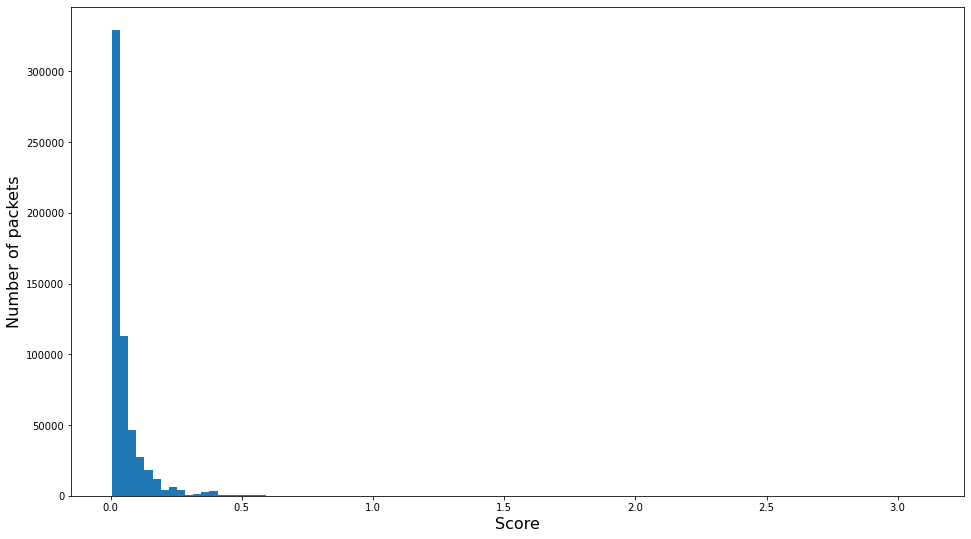

In [16]:
plt.figure(figsize=(16,9))
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

In [17]:
mega_df['score'] = score_list

In [20]:
mega_df['score'].quantile(.98)

0.3297251116532274

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                190       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 18)                198       
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.save("autoencoder_model")

INFO:tensorflow:Assets written to: autoencoder_model/assets


INFO:tensorflow:Assets written to: autoencoder_model/assets
